In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [2]:
#Carga de datos
data_array = np.load ('data_proyecto/proyecto_data/proyecto_training_data.npy') 
data = pd.DataFrame (data_array,columns=["SalePrice","OverallQual","stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
data.head(3)
#data_array

,SalePrice,OverallQual,stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0


1460
1460


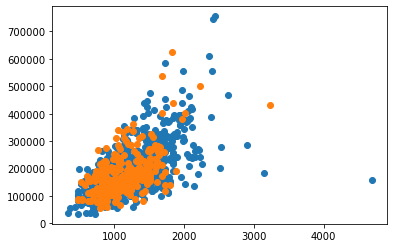

In [3]:
#Dividir dataset en Train and Test
#X_train, X_test, y_train, y_test =train_test_split(data_array[:,2],data_array[:,0],test_size = 0.20)
X_train, X_test, y_train, y_test =train_test_split(data_array[:,2],data_array[:,0],test_size = 0.20)
print(len(X_train)+len(X_test))
print(len(data.SalePrice))
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.show()

In [4]:
# Estandarizacion de las columnas numéricas, comprobacion de tipo de datos
print(X_train.dtype)
print(y_train.dtype)


float64
float64


In [37]:
#print((X_train))
X_train=np.reshape(X_train,(-1,1))/100 # Vector 
y_train=np.reshape(y_train,(-1,1))/100 # Vector

y_train.shape
print(X_train)

[[ 8.48]
 [12.44]
 [11.12]
 ...
 [ 9.12]
 [13.63]
 [ 8.16]]


### Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 + β1 ∗ x.

In [38]:
def f_coste(x, y, b1, b0):
    m = len(x)
    #betas=np.array([[b1],[b0]])
    #vector1=np.ones_like(x)
    #A=np.hstack([x,np.ones_like(x)])
    hipotesis=np.matmul(np.hstack([x,np.ones_like(x)]),np.array([[b1],[b0]]))  # Vector de hipostesis b0+b1*x[i]
    err=(y-hipotesis)**2  # Vector de errores por cada elemento de los array (y[i] - hipotesis) ** 2
    fun_cost=sum(err)/(2*m)
    return fun_cost
print(f_coste(X_train,y_train,0,15))

[1936627.81834867]


In [44]:
def funCosto(x, y, betas):
    x_b=np.hstack([x,np.ones_like(x)])
    return np.sum(np.square((x_b.dot(betas) - y))) / (2 * len(x))
print(funCosto(X_train,y_train,np.array([[0],[15]])))

1936627.8183486732


In [90]:
def DescGrad(x, y, α, epochs):
    J = []
    n_iter = [] 
    theta = np.zeros([2, 1]) # Inicializacion de los parametros b0 y b1 del modelo
    x=np.hstack([x,np.ones_like(x)]) # Matriz de dos columnas
    m=len(x)
    for _ in range(epochs):
        theta[0][0] = theta[0][0] - α * np.sum((x.dot(theta) - y)) / (m)
        theta[1][0] = theta[1][0] - α * np.sum(np.transpose((x.dot(theta) - y)) * (np.transpose(np.transpose(x)[1]))) / (m)
        
        J.append(funCosto(X_train, y_train, theta))
        n_iter.append(_)
    
    df = pd.DataFrame([n_iter, J])
    df = df.transpose()
    #DGEst.reset_index(inplace=True)
    df.columns = ['N_ITER', 'J']
    df['N_ITER'] = df['N_ITER'] + 1

    return theta, df

In [91]:
BETAS, Iter = DescGrad(X_train,y_train, α = 0.005, epochs = 500)


In [92]:
Iter

,N_ITER,J
0,1.0,1.744963e+06
1,2.0,1.553185e+06
2,3.0,1.385082e+06
3,4.0,1.237740e+06
4,5.0,1.108605e+06
...,...,...
495,496.0,2.019053e+05
496,497.0,2.019053e+05
497,498.0,2.019053e+05
498,499.0,2.019053e+05


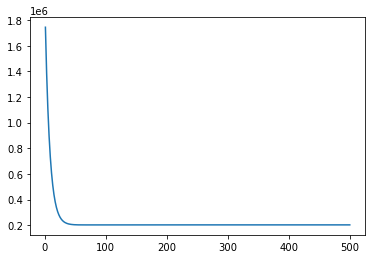

In [93]:
plt.plot(Iter["N_ITER"],Iter["J"])
#plt.scatter(X_test,y_test)
plt.show()